# Questions to be answered from this data : 


1. what is the number of cars by make ?
2. what is cars make popularity ? 
3. what is the price disribution depends on the cylinders? 



In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

**importing our data into dataframe and exploring it** 

In [ ]:
df = pd.read_csv('/content/data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2,Luxury,Compact,Convertible,28,18,3916,34500


**checking data types**


In [ ]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors        int64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
df.shape

(2939, 16)


**cleaning our data**

In [ ]:
df = df.drop(['Number of Doors','Vehicle Size','Vehicle Style','Engine Fuel Type','Market Category'],axis= 1)


In [ ]:
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


In [ ]:
df.shape

(2939, 11)

**renaming the columns**

In [ ]:
df = df.rename(columns={'Engine HP': 'HP','Engine Cylinders': 'Cylinders','Transmission Type':'Transmission','highway MPG': 'MPG-H','city mpg': 'MPG-C','MSRP':'Price'})

In [ ]:
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,3916,34500


**dealing with duplicated rows**

In [ ]:
print("the number of duplicated rows is:",df.duplicated().sum())

the number of duplicated rows is: 246


In [ ]:
df=df.drop_duplicates()

In [ ]:
df.shape

(2693, 11)


**dealing with nan values**


In [ ]:
df.isnull().sum()

In [ ]:
df.dropna()

In [ ]:
df.shape

(2684, 11)

cylinders values

In [ ]:
df = df.loc[(df["Cylinders"] != 0) & (df['Price'] != 0)]

**number of cars made by make**

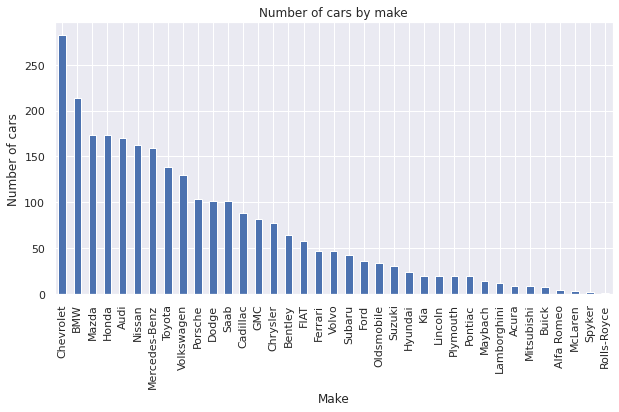

In [ ]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Number of cars by make')
plt.ylabel('Number of cars')
plt.xlabel('Make');

**cars make popularity**

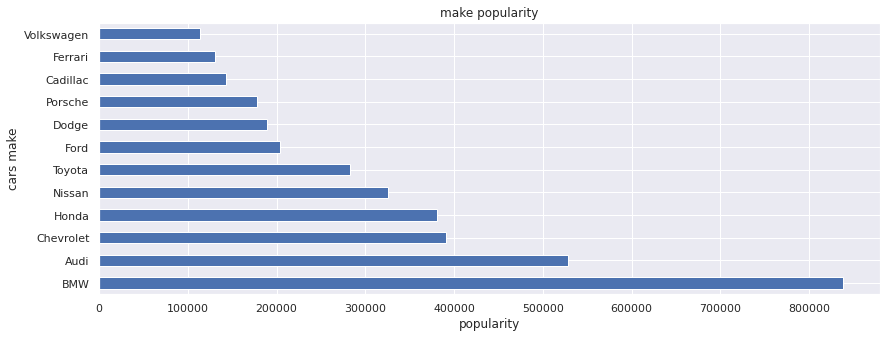

In [ ]:
plt.figure(figsize=(14,5))
df.groupby('Make')['Popularity'].sum().nlargest(12).plot(kind='barh')
plt.title('make popularity')
plt.ylabel('cars make')
plt.xlabel('popularity');

**price distribution depends on cylinders**



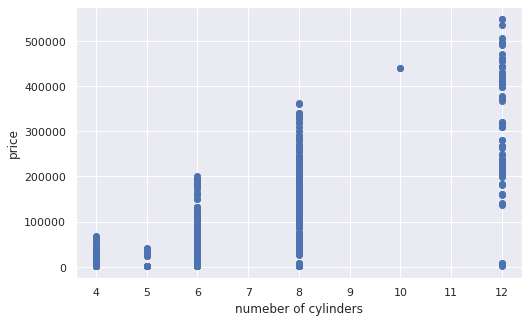

In [ ]:
fig , ax = plt.subplots(figsize=(8,5))
ax.scatter(df['Cylinders'],df['Price']);
ax.set_xlabel('numeber of cylinders')
ax.set_ylabel('price');
plt.show()

In [ ]:
df.loc[df['Cylinders'] == 11]

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG-H,MPG-C,Popularity,Price


**price distribution depends on the HP**

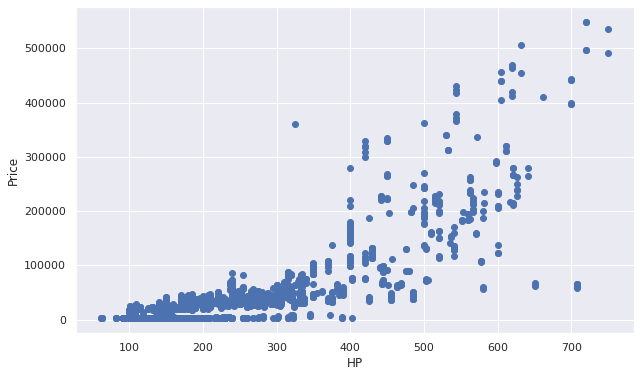

In [ ]:
fig, ay = plt.subplots(figsize=(10,6))
ay.scatter(df['HP'], df['Price'])
ay.set_xlabel('HP')
ay.set_ylabel('Price')
plt.show()